In [252]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

## CS418 Data Science Final Project

### Names: Abhi Shah, Brian De Villa,  Katherine Misyutina, Matthew Jankowski

#### Dataset Topic:
Child Mortality for children under the age of 5. Compare different countries and diseases. Show differences between devloped and devloping countries.

#### Criteria:
In early April (exact date to be announced) you must submit your progress report. Your progress report must contain the following:

    1)An introduction part to your data:
        * Data spec: describe your data. Include the format and any assumptions about your data, size of the dataset
        * A link to your full data in downloadable form, you can keep your data on Google Drive, Box, DropBox, GitHub, or personal website
        * A sample of your data ( n = 10 - 50)
        * A report of your data collection process
            * How did you collect your data
            * How did you clean your data
            * Mention any difficulties you faced in the beginning steps
2) A summary of challenges and observations you have made so far. 
A brief mention of your next steps and what you plan to do with your data as you move into the analysis (If you are already in the analysis phase you can mention that as well)
Group member duties





<h1> Loading Cleaned Data </h2>

In [253]:
dfPopulation = pd.read_csv('../datasets/CleanedPopulation/Clean_population.csv')
dfAcute_Lower_Respiratory_infections = pd.read_csv('../datasets/CleanedDiseases/CleanedAcute_Lower_Respiratory_infections.csv')
dfInjuries = pd.read_csv('../datasets/CleanedDiseases/CleanedInjuries.csv')
dfMeasles_mortality = pd.read_csv('../datasets/CleanedDiseases/Cleanedmeasles_mortality.csv')
dfPrematurity = pd.read_csv('../datasets/CleanedDiseases/CleanedPrematurity.csv')
dfSepsis = pd.read_csv('../datasets/CleanedDiseases/CleanedSepsis.csv')
dfGDP = pd.read_csv('../datasets/CleanedGDP/Clean_gdp2.csv', index_col=0)

dfPopulation

,country,2000,2005,2010,2015
0,Albania,3159,3025,2987,3030
1,Australia,19054,20233,21516,22752
2,Bangladesh,132151,144139,156119,168958
3,Brazil,174316,186021,195835,204260
4,Burundi,6716,7789,9121,10743
5,Canada,31100,32387,33760,35100
6,Chile,15175,15980,16760,17509
7,China,1268302,1302285,1336681,1367486
8,Colombia,38911,41488,44206,46737
9,Dominican Republic,8469,9165,9824,10479


<h1> Percent of Disease based on total population </h2>
Gets the pecent of the diseased children over the total population of the country during that year

In [269]:
acute_lower_respiratory_infection_percentage = (dfAcute_Lower_Respiratory_infections.iloc[:, 1:5]/(dfPopulation.iloc[:,1:5] * 1000)) * 100
injuries_percentage = (dfInjuries.iloc[:, 1:5]/(dfPopulation.iloc[:,1:5] * 1000)) * 100
measles_mortality_percentage = (dfMeasles_mortality.iloc[:, 1:5]/(dfPopulation.iloc[:,1:5] * 1000)) * 100
prematurity_percentage = (dfPrematurity.iloc[:, 1:5]/(dfPopulation.iloc[:,1:5] * 1000)) * 100
sepsis_percentage = (dfSepsis.iloc[:, 1:5]/(dfPopulation.iloc[:, 1:5] * 1000)) * 100

dfAcute_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])
dfInjuries_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])
dfMeasles_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])
dfPrematurity_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])
dfSepsis_percentage = pd.DataFrame(columns =['Countries', '2000', '2005', '2010', '2015'])

def createPercentageDataframe(tempDF, percentageDF, countriesDataFrame):

    tempDF['Countries'] = countriesDataFrame
    for year in percentageDF:
        tempDF[year] = percentageDF[str(year)]
    
createPercentageDataframe(dfAcute_percentage, acute_lower_respiratory_infection_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])
createPercentageDataframe(dfInjuries_percentage, injuries_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])
createPercentageDataframe(dfMeasles_percentage, measles_mortality_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])
createPercentageDataframe(dfPrematurity_percentage, prematurity_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])
createPercentageDataframe(dfSepsis_percentage, sepsis_percentage, dfAcute_Lower_Respiratory_infections.iloc[:, 0])

def sortingByPercentage(percentageDataF, dfPopulation):
    percentageDataF = percentageDataF.sort_values(by=['2000','2005','2010','2015'])
    dfPopulation['country'] = pd.Categorical(dfPopulation['country'], percentageDataF['Countries'])
    dfPopulation = dfPopulation.sort_values('country')
    
    return percentageDataF, dfPopulation


<h1> Create GDP graph </h1>
Creates a gdp bar graph for each country for the given country(2000, 2005, 2010, 2015)

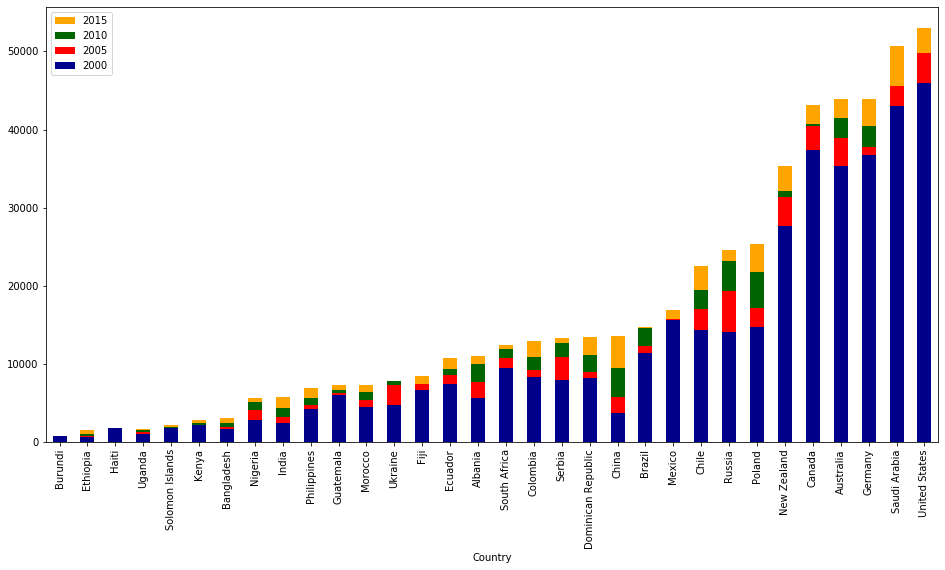

In [255]:
dfGDP = dfGDP.sort_values(by=['2015','2010','2005','2000'])
_, ax = plt.subplots()
dfGDP['2015'].plot(kind='bar', ax=ax, color='Orange',figsize=(16,8),legend=True)
dfGDP['2010'].plot(kind='bar', ax=ax, color='DarkGreen',legend=True)
dfGDP['2005'].plot(kind='bar', ax=ax, color='Red',legend=True)
dfGDP['2000'].plot(kind='bar', ax=ax, color='DarkBlue',legend=True)
plt.show();

<h1> Create Disease Graphs </h2>
Creates graphs for each of the diseases per country during the years choosen(2000, 2005, 2010, 2015)


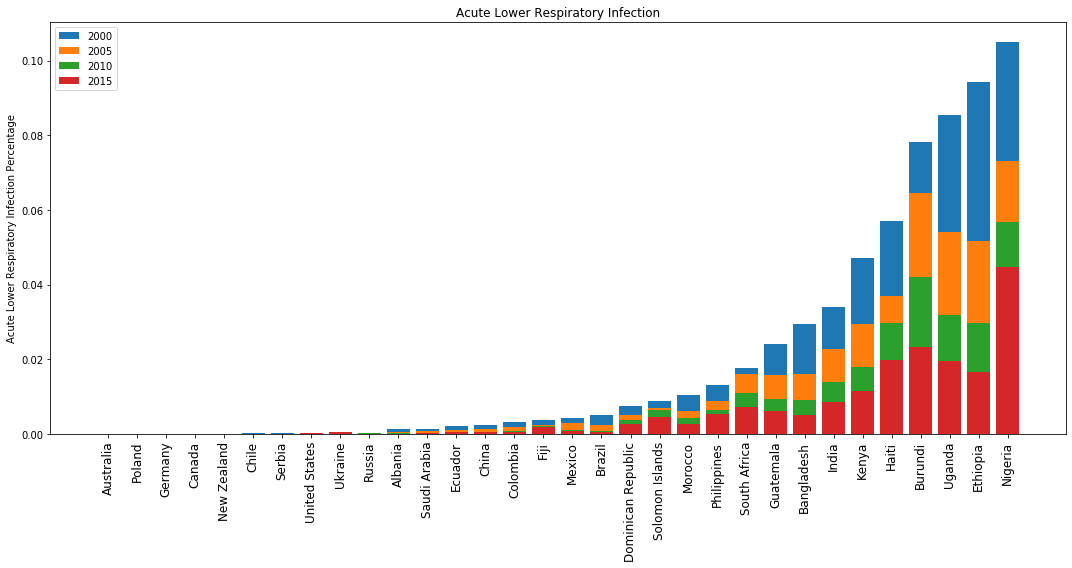

In [275]:
plt.figure(1, figsize = (15,8))
dfAcute_percentage, dfPopulation = sortingByPercentage(dfAcute_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfAcute_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfAcute_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfAcute_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfAcute_percentage.iloc[:, 4])
plt.title("Acute Lower Respiratory Infection")
plt.xticks(rotation = 90)
plt.ylabel("Acute Lower Respiratory Infection Percentage")
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.show();

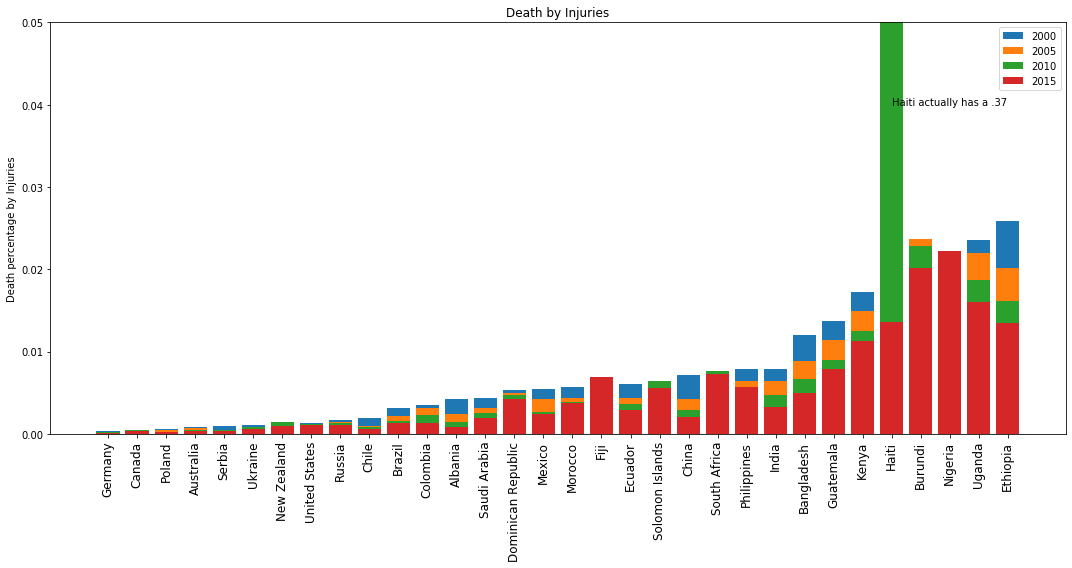

In [277]:
plt.figure(2, figsize = (15,8))
dfInjuries_percentage, dfPopulation = sortingByPercentage(dfInjuries_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfInjuries_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfInjuries_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfInjuries_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfInjuries_percentage.iloc[:, 4])
plt.title("Death by Injuries")
plt.xticks(rotation = 90)
plt.ylabel("Death percentage by Injuries")
plt.ylim(0, .05)
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.text("Haiti", .04, "Haiti actually has a .37", horizontalalignment='left')
plt.show();

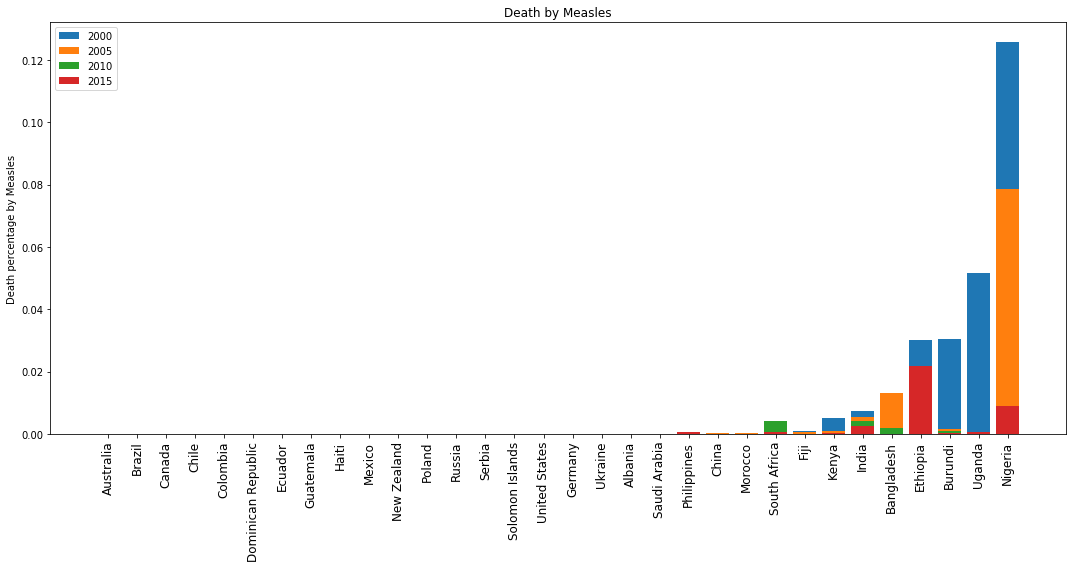

In [279]:
plt.figure(3, figsize = (15,8))
dfMeasles_percentage, dfPopulation = sortingByPercentage(dfMeasles_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfMeasles_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfMeasles_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfMeasles_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfMeasles_percentage.iloc[:, 4])
plt.title("Death by Measles")
plt.xticks(rotation = 90)
plt.ylabel("Death percentage by Measles")
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.show();

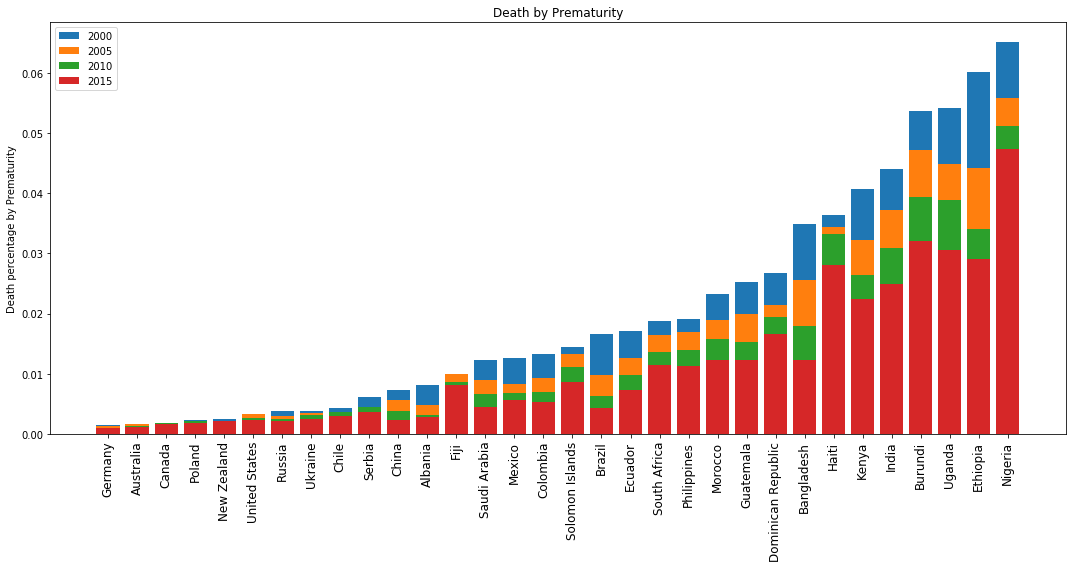

In [280]:
plt.figure(4, figsize = (15,8))
dfPrematurity_percentage, dfPopulation = sortingByPercentage(dfPrematurity_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfPrematurity_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfPrematurity_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfPrematurity_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfPrematurity_percentage.iloc[:, 4])
plt.title("Death by Prematurity")
plt.xticks(rotation = 90)
plt.ylabel("Death percentage by Prematurity")
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.show();

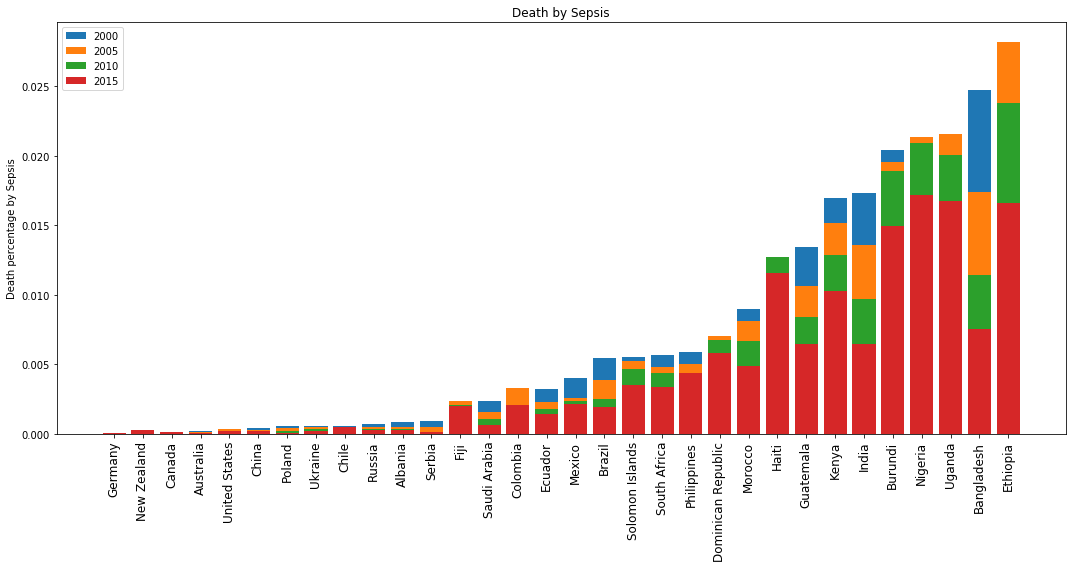

In [282]:
plt.figure(5, figsize = (15,8))
dfSepsis_percentage, dfPopulation = sortingByPercentage(dfSepsis_percentage, dfPopulation)
plt.bar(dfPopulation.iloc[:, 0], dfSepsis_percentage.iloc[:, 1])
plt.bar(dfPopulation.iloc[:, 0], dfSepsis_percentage.iloc[:, 2])
plt.bar(dfPopulation.iloc[:, 0], dfSepsis_percentage.iloc[:, 3])
plt.bar(dfPopulation.iloc[:, 0], dfSepsis_percentage.iloc[:, 4])
plt.title("Death by Sepsis")
plt.xticks(rotation = 90)
plt.ylabel("Death percentage by Sepsis")
plt.legend(["2000", "2005", "2010","2015"])
plt.tick_params(axis = 'x', labelsize =12)
plt.tight_layout()
plt.show();